# Anomaly detection for datacenter

You have collected logs of virtual machines working in datacenters (actually, the dataset is a real data from a number of real virtual machines). The logs are CPU load and memory load (RAM) for every VM. Your goal is to build a system detecting abnormal behavior of the VMs so that the system administrator can notice them and pay attention.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import mixture

In [2]:
from matplotlib.patches import Ellipse

In [3]:
%matplotlib inline

## Setting up the environment

The log file you are going to work with is `system-load.csv`. You may want to open it in text editor or Excel to examine its internal structure.

In [4]:
input_filename = "system-load.csv"

## Loading the data

In [5]:
df_load = pd.read_csv(input_filename)

In [6]:
X = df_load.values

Let us take a look at the dataset.

In [7]:
df_load.head(5)

,cpu_load,ram_usage
0,1.29,290.0
1,2.66,332.0
2,0.88,372.0
3,2.57,362.0
4,2.44,480.0


In [8]:
X[:5]

array([[  1.29, 290.  ],
       [  2.66, 332.  ],
       [  0.88, 372.  ],
       [  2.57, 362.  ],
       [  2.44, 480.  ]])

## Training Gaussian mixture model

Train Gaussian mixture model on the datacenter data.

Let's start with the number of components being 3.

In [14]:
gaussianmm = mixture.GaussianMixture(n_components=3)

## Setting up model parameters

Set up the number of Gaussians and abnormality threshold. Note, there are no labels for the points in this dataset. We do not know which (if any) servers behaving abnormally. Think how would you decide on the threshold. Visualizing the results could help.

In [15]:
gaussianmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

## Plotting the results

Visualize all the points from the dataset and density estimation of your model over them. Draw all abnormal points (falling below the threshold) in red.

0.41 6.75 233.0 770.0


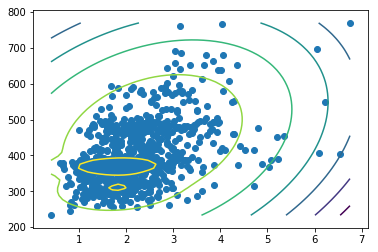

In [17]:
min_cpu = np.min(df_load.cpu_load) 
max_cpu = np.max(df_load.cpu_load)
min_ram = np.min(df_load.ram_usage)
max_ram = np.max(df_load.ram_usage)

print(min_cpu, max_cpu, min_ram, max_ram)

X, Y = np.meshgrid(np.linspace(min_cpu, max_cpu), np.linspace(min_ram,max_ram))
XX = np.array([X.ravel(), Y.ravel()]).T
# Z = gaussianmm.score_samples(XX)
Z = Z.reshape((50,50))

plt.contour(X, Y, Z)
plt.scatter(df_load.cpu_load, df_load.ram_usage)
plt.show()